In [3]:
import numpy as np
from matplotlib import pyplot as plt
import Arms as arm
from StochasticBandit import * 
from BanditBaselines import * # you will need UCB alpha to your baselines 

from Experiments import *

In [44]:
class DelayedKLUCB():
    def __init__(self,nbArms,windowSize,lambda_value,Beta=0.5,tau=0.5,setting='censored'):
        self.nbArms = nbArms
        self.Beta = Beta
        self.setting=setting
        self.lambda_value = lambda_value
        self.tau = tau
        self.windowSize = windowSize
        self.clear()
        
    def clear(self):
        self.nbDraws = np.zeros(self.nbArms)
        self.nbDrawsHat = np.zeros(self.nbArms)
        self.choosenArms = []
        self.cumRewards = np.zeros(self.nbArms)
        self.t = 0
    
    def chooseArmToPlay(self):
        
        # Initialization
        if (min(self.nbDraws)==0):
#             print('index :',-self.nbDraws)
            return randmax(-self.nbDraws)
        
        # t > K
        else:
#             print('conversion rate ',self.conversionRateEstimator)
            N=100
            potential_q = np.zeros((N,self.nbArms))
            for arm_index in range(self.nbArms):
                i = 0
                if self.conversionRateEstimator[arm_index] == 0.:
                    convRate = 0.00001
                else:
                    convRate = self.conversionRateEstimator[arm_index]
#                 print(np.linspace(convRate,1,num = N))
                for q in np.linspace(convRate,1,num = N):
                    d_poisson = convRate*np.log(convRate)/q + (q - convRate)
                    if self.nbDrawsHat[arm_index] * d_poisson < self.Beta(self.t):
                        potential_q[i,arm_index] = q
                        i+=1
#             print(potential_q)
            index = np.max(potential_q,axis=0)
            return randmax(index)
    
    
    def receiveReward(self, arm, reward):
        
        # Simple updates
        self.t = self.t + 1
        self.choosenArms.append(arm)
        self.nbDraws[arm] = self.nbDraws[arm] + 1
        
        # Number of draws hat (depending on the setting)
        if self.setting=='censored':
#             print(len(self.choosenArms),len(np.array(self.choosenArms[:self.t-self.windowSize]))+len(np.array(self.choosenArms[self.t-self.windowSize:self.t-1])))
            for arm in range(self.nbArms):
                taus = np.array([self.tau(self.t-(s+1)) for s in range(self.t-self.windowSize,self.t)])
                self.nbDrawsHat[arm] = self.tau(self.windowSize)*np.sum(np.array(self.choosenArms[:self.t-self.windowSize])==arm) + np.sum(taus*(np.array(self.choosenArms[self.t-self.windowSize:self.t])==arm))
        elif self.setting=='uncensored':
            for arm in range(self.nbArms):
                taus=np.array([self.tau(self.t-(s+1)) for s in range(self.t)])
                self.nbDrawsHat[arm] = np.sum(taus*(np.array(self.choosenArms)==arm))
#         print(self.nbDrawsHat)
                
        # Sum of rewards
        for arm in range(self.nbArms):
            for time_round in range(self.t):
                for u in range(time_round):
                    if self.choosenArms[u] == arm:
                        self.cumRewards[arm] += reward*(np.random.geometric(self.lambda_value) <= time_round-u)
        
        # Computing Conversion rate
        self.conversionRateEstimator = self.cumRewards/self.nbDrawsHat
        print('conversion rate : ',self.conversionRateEstimator)
        
        
        
    
    def name(self):
        if self.setting == 'censored':
            return "DelayedCensoredKLUCB"
        elif self.setting == 'uncensored':
            return "DelayedUncensoredKLUCB"

<ipython-input-44-f2b3f1e6b7ed>:74: RuntimeWarning: invalid value encountered in true_divide
  self.conversionRateEstimator = self.cumRewards/self.nbDrawsHat


conversion rate :  [ 0. nan nan]
conversion rate :  [ 0.  0. nan]
conversion rate :  [2. 0. 0.]
conversion rate :  [1. 0. 0.]
conversion rate :  [1. 0. 0.]
conversion rate :  [2.66666667 4.         2.        ]
conversion rate :  [5.33333333 4.         6.        ]
conversion rate :  [5.33333333 4.         3.        ]
conversion rate :  [8.         9.33333333 8.        ]
conversion rate :  [15.  11.5 13. ]
conversion rate :  [12.  11.5 13. ]
conversion rate :  [12.         11.5         8.66666667]
conversion rate :  [10.         11.5         8.66666667]
conversion rate :  [17.         16.8        15.33333333]
conversion rate :  [17.         14.         15.33333333]
conversion rate :  [14.57142857 14.         15.33333333]
conversion rate :  [25.71428571 24.         20.        ]
conversion rate :  [33.75       34.33333333 32.        ]
conversion rate :  [46.5        41.42857143 43.        ]
conversion rate :  [41.33333333 41.42857143 43.        ]
conversion rate :  [41.33333333 41.42857143

<ipython-input-44-f2b3f1e6b7ed>:74: RuntimeWarning: invalid value encountered in true_divide
  self.conversionRateEstimator = self.cumRewards/self.nbDrawsHat


conversion rate :  [2.66666667 4.         2.        ]
conversion rate :  [2.66666667 2.         2.        ]
conversion rate :  [2. 2. 2.]
conversion rate :  [2.         2.         1.33333333]
conversion rate :  [2.         1.33333333 1.33333333]
conversion rate :  [6.8        6.66666667 8.66666667]
conversion rate :  [6.8        6.66666667 6.5       ]
conversion rate :  [6.8 5.  6.5]
conversion rate :  [6.8 5.  5.2]
conversion rate :  [13.66666667 15.5        13.2       ]
conversion rate :  [23.66666667 18.8        21.6       ]
conversion rate :  [30.57142857 28.8        32.        ]
conversion rate :  [43.42857143 40.8        36.66666667]
conversion rate :  [38.         40.8        36.66666667]
conversion rate :  [38.         34.         36.66666667]
conversion rate :  [47.77777778 46.33333333 51.        ]
conversion rate :  [47.77777778 46.33333333 43.71428571]
conversion rate :  [57.         63.33333333 60.85714286]
conversion rate :  [74.4        68.28571429 78.85714286]
conversion

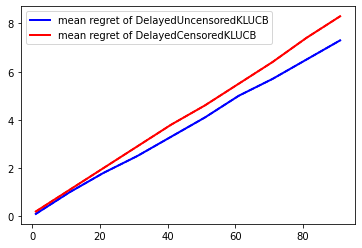

In [45]:
# Creating a MAB
K=3
arms=[arm.Bernoulli(i) for i in [0.5, 0.4, 0.3]]
mab = MAB(arms)


Nexp=1
T=100
mu=5 # expectation of the delay
m=1
epsilon = 0.1

strategy1 = DelayedKLUCB(nbArms=K,lambda_value=mu**-1,windowSize=m,Beta=lambda x: (1+epsilon)*np.log(x) ,tau=lambda x : 0.5,setting='uncensored')
strategy2 = DelayedKLUCB(nbArms=K,lambda_value=mu**-1,windowSize=m,Beta=lambda x: (1+epsilon)*np.log(x) ,tau=lambda x : 0.5,setting='censored')

RunExpes([strategy1,strategy2],mab,Nexp,T,step=10,quantiles="on")